In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
df_ctgan = pd.read_csv('data_ctgan_T2.csv')
df_ganblrpp = pd.read_csv('data_ganblrpp.csv')
df_copula_gan = pd.read_csv('data_copula_gan.csv')
df_castgan = pd.read_csv("data_castgan.csv")


In [8]:
df.head()

Average Packet Size   Packet Length Std   Packet Length Variance  \
0                   9.0                 0.0                      0.0   
1                   9.0                 0.0                      0.0   
2                   9.0                 0.0                      0.0   
3                   9.0                 0.0                      0.0   
4                   9.0                 0.0                      0.0   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0                  6.0                             0                   0   
1                  6.0                             6                   6   
2                  6.0                             6                   6   
3                  6.0                             6                   6   
4                  6.0                             0                   0   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0              54865                    0.0                      0.0   
1              55054                    6.0                      6.0   
2              55055                    6.0                      6.0   
3              46236                    6.0                      6.0   
4              54863                    0.0                      0.0   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                      33  ...                           12   
1                      29  ...                            6   
2                      29  ...                            6   
3                      31  ...                            6   
4                      32  ...                           12   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                   6                      0                        -1   
1                   6                      6                       256   
2                   6                      6                       256   
3                   6                      6                       329   
4                   6                      0                        -1   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                       6                      6.0                    6.0   
1                       6                      6.0                    6.0   
2                       6                      6.0                    6.0   
3                       6                      6.0                    6.0   
4                       6                      6.0                    6.0   

    Flow IAT Max  Flow Bytes/s  target  
0              3  4.000000e+06       0  
1            109  1.100917e+05       0  
2             52  2.307692e+05       0  
3             34  3.529412e+05       0  
4              3  4.000000e+06       0  

[5 rows x 21 columns]

In [9]:
df.columns

Index([' Average Packet Size', ' Packet Length Std', ' Packet Length Variance',
       ' Packet Length Mean', ' Total Length of Bwd Packets',
       ' Subflow Bwd Bytes', ' Destination Port', ' Avg Bwd Segment Size',
       ' Bwd Packet Length Mean', 'Init_Win_bytes_forward',
       ' Subflow Fwd Bytes', 'Total Length of Fwd Packets',
       ' Max Packet Length', 'Bwd Packet Length Max',
       ' Init_Win_bytes_backward', ' Fwd Packet Length Max',
       ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Flow IAT Max',
       'Flow Bytes/s', 'target'],
      dtype='object')

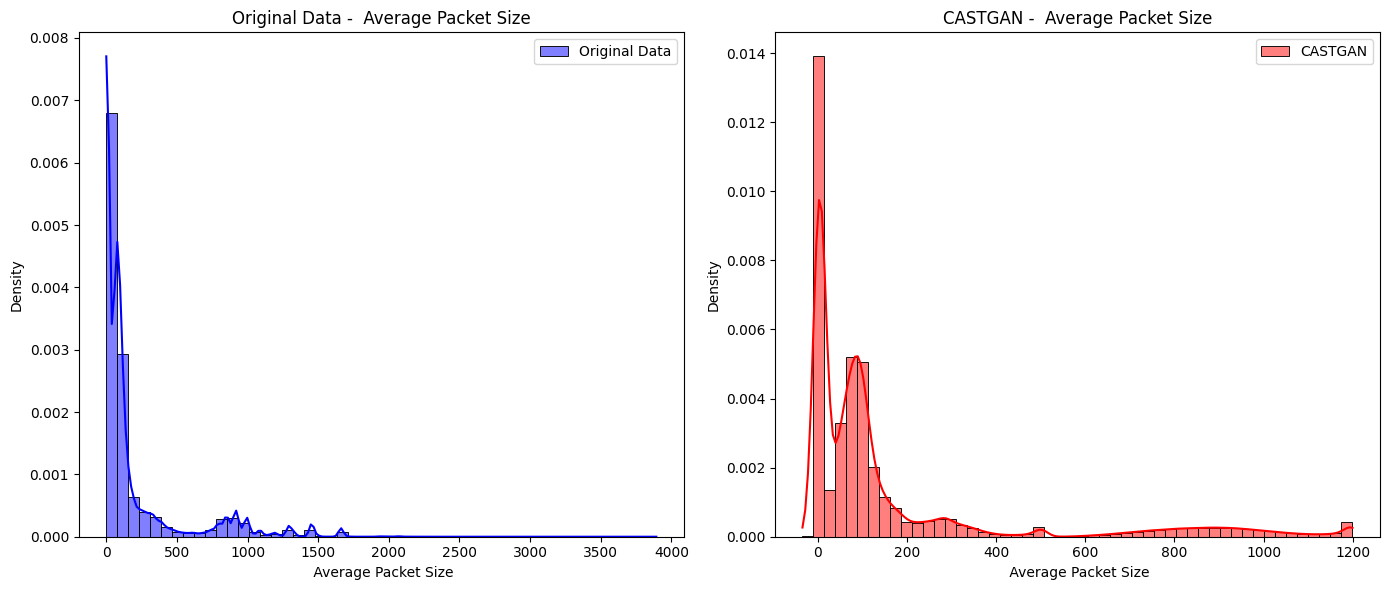

In [14]:
# Plotting
plt.figure(figsize=(14, 6))

# Original Data - Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df[' Average Packet Size'], kde=True, color='blue', label='Original Data', stat='density', bins=50)
plt.title('Original Data -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# CASTGAN Data - Histogram and KDE
plt.subplot(1, 2, 2)
sns.histplot(df_castgan[' Average Packet Size'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)
plt.title('CASTGAN -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


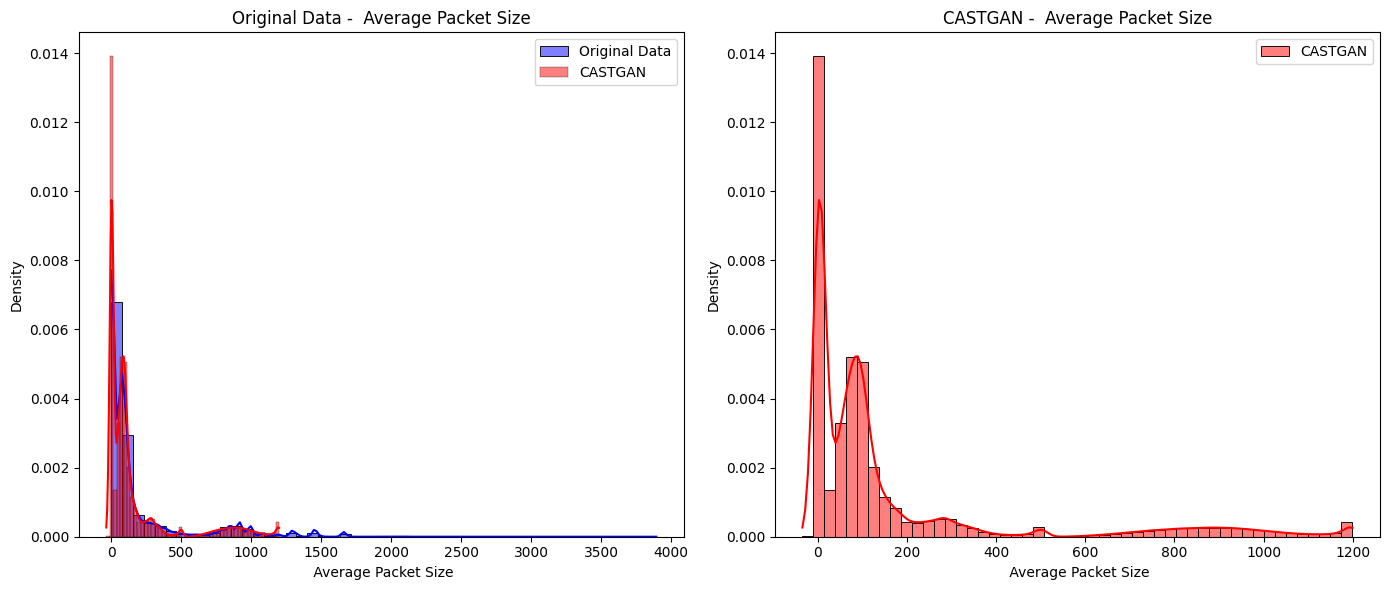

In [11]:


# Plotting
plt.figure(figsize=(14, 6))

# Original Data - Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df[' Average Packet Size'], kde=True, color='blue', label='Original Data', stat='density', bins=50)
sns.histplot(data_castgan[' Average Packet Size'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)

plt.title('Original Data -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# CASTGAN Data - Histogram and KDE
plt.subplot(1, 2, 2)
sns.histplot(data_castgan[' Average Packet Size'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)
plt.title('CASTGAN -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
df_castgan.head()

Average Packet Size   Packet Length Std   Packet Length Variance  \
0             38.115658            2.607349            -3.610255e+02   
1             93.933917           38.094307             8.015107e+02   
2            956.519714         1770.447889             3.725787e+06   
3            172.410231           68.884006             5.663359e+02   
4            204.496926          387.361066             8.445416e+04   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0            16.041207                           109                 356   
1            68.510482                           246                 146   
2           266.445928                         12849               13530   
3           107.619974                           264                 323   
4           171.843851                           442                2785   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0                607               1.737650                 0.065384   
1                 64             110.908674               110.228143   
2                 55             373.455743              1027.974466   
3                 61             183.587533               225.413937   
4                315             203.306731               189.582542   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                    8292  ...                           68   
1                     -23  ...                           66   
2                     293  ...                          325   
3                     -11  ...                          151   
4                   29192  ...                         2080   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                  47                      0                         0   
1                 102                    104                         0   
2                5498                   4991                       233   
3                 194                    188                         0   
4                2164                    875                       328   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                      46                18.156864              26.513248   
1                      46                42.288812              44.380350   
2                     347                42.563971              47.171809   
3                      86                98.438768              95.094196   
4                     802               103.074065              99.700263   

    Flow IAT Max  Flow Bytes/s  target  
0           2069  3.049718e+06       0  
1          49945  5.704117e+03       0  
2       10441140 -5.630120e+01       1  
3          -9774  2.951534e+06       0  
4         558116  6.450475e+03       0  

[5 rows x 21 columns]

In [16]:
df.head()

Average Packet Size   Packet Length Std   Packet Length Variance  \
0                   9.0                 0.0                      0.0   
1                   9.0                 0.0                      0.0   
2                   9.0                 0.0                      0.0   
3                   9.0                 0.0                      0.0   
4                   9.0                 0.0                      0.0   

    Packet Length Mean   Total Length of Bwd Packets   Subflow Bwd Bytes  \
0                  6.0                             0                   0   
1                  6.0                             6                   6   
2                  6.0                             6                   6   
3                  6.0                             6                   6   
4                  6.0                             0                   0   

    Destination Port   Avg Bwd Segment Size   Bwd Packet Length Mean  \
0              54865                    0.0                      0.0   
1              55054                    6.0                      6.0   
2              55055                    6.0                      6.0   
3              46236                    6.0                      6.0   
4              54863                    0.0                      0.0   

   Init_Win_bytes_forward  ...  Total Length of Fwd Packets  \
0                      33  ...                           12   
1                      29  ...                            6   
2                      29  ...                            6   
3                      31  ...                            6   
4                      32  ...                           12   

    Max Packet Length  Bwd Packet Length Max   Init_Win_bytes_backward  \
0                   6                      0                        -1   
1                   6                      6                       256   
2                   6                      6                       256   
3                   6                      6                       329   
4                   6                      0                        -1   

    Fwd Packet Length Max   Fwd Packet Length Mean   Avg Fwd Segment Size  \
0                       6                      6.0                    6.0   
1                       6                      6.0                    6.0   
2                       6                      6.0                    6.0   
3                       6                      6.0                    6.0   
4                       6                      6.0                    6.0   

    Flow IAT Max  Flow Bytes/s  target  
0              3  4.000000e+06       0  
1            109  1.100917e+05       0  
2             52  2.307692e+05       0  
3             34  3.529412e+05       0  
4              3  4.000000e+06       0  

[5 rows x 21 columns]

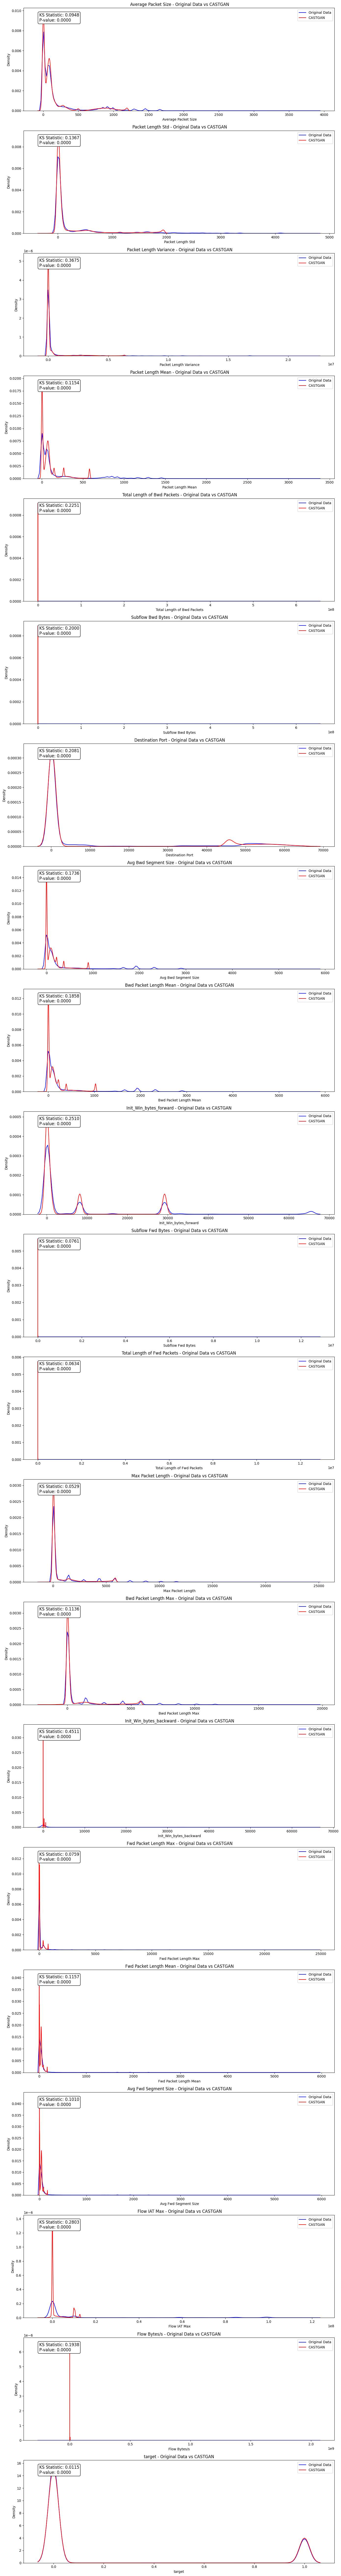

In [17]:


# List of features (column names)
features = df.columns

# Create a figure with subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(14, 5 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(df[feature], df_castgan[feature])

    # Plot KDE for the original data
    sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i])

    # Plot KDE for the CASTGAN data
    sns.kdeplot(df_castgan[feature], color='red', label='CASTGAN', ax=axes[i])

    # Customize each subplot
    axes[i].set_title(f'{feature} - Original Data vs CASTGAN')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()

    # Annotate with KS statistic and p-value
    axes[i].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


In [18]:
# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
synthetic_datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Create a figure with subplots
num_features = len(features)
num_datasets = len(synthetic_datasets)
fig, axes = plt.subplots(num_features, num_datasets, figsize=(14 * num_datasets, 5 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    for j, (synthetic_data, title) in enumerate(zip(synthetic_datasets, titles)):
        # Perform KS test
        ks_statistic, p_value = stats.ks_2samp(df[feature], synthetic_data[feature])
        
        # Plot KDE for the original data
        sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i, j])
        
        # Plot KDE for the synthetic data
        sns.kdeplot(synthetic_data[feature], color='red', label=title, ax=axes[i, j])
        
        # Customize each subplot
        axes[i, j].set_title(f'{feature} - Original Data vs {title}')
        axes[i, j].set_xlabel(feature)
        axes[i, j].set_ylabel('Density')
        axes[i, j].legend()
        
        # Annotate with KS statistic and p-value
        #axes[i, j].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
         #               transform=axes[i, j].transAxes, fontsize=12, verticalalignment='top', 
          #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


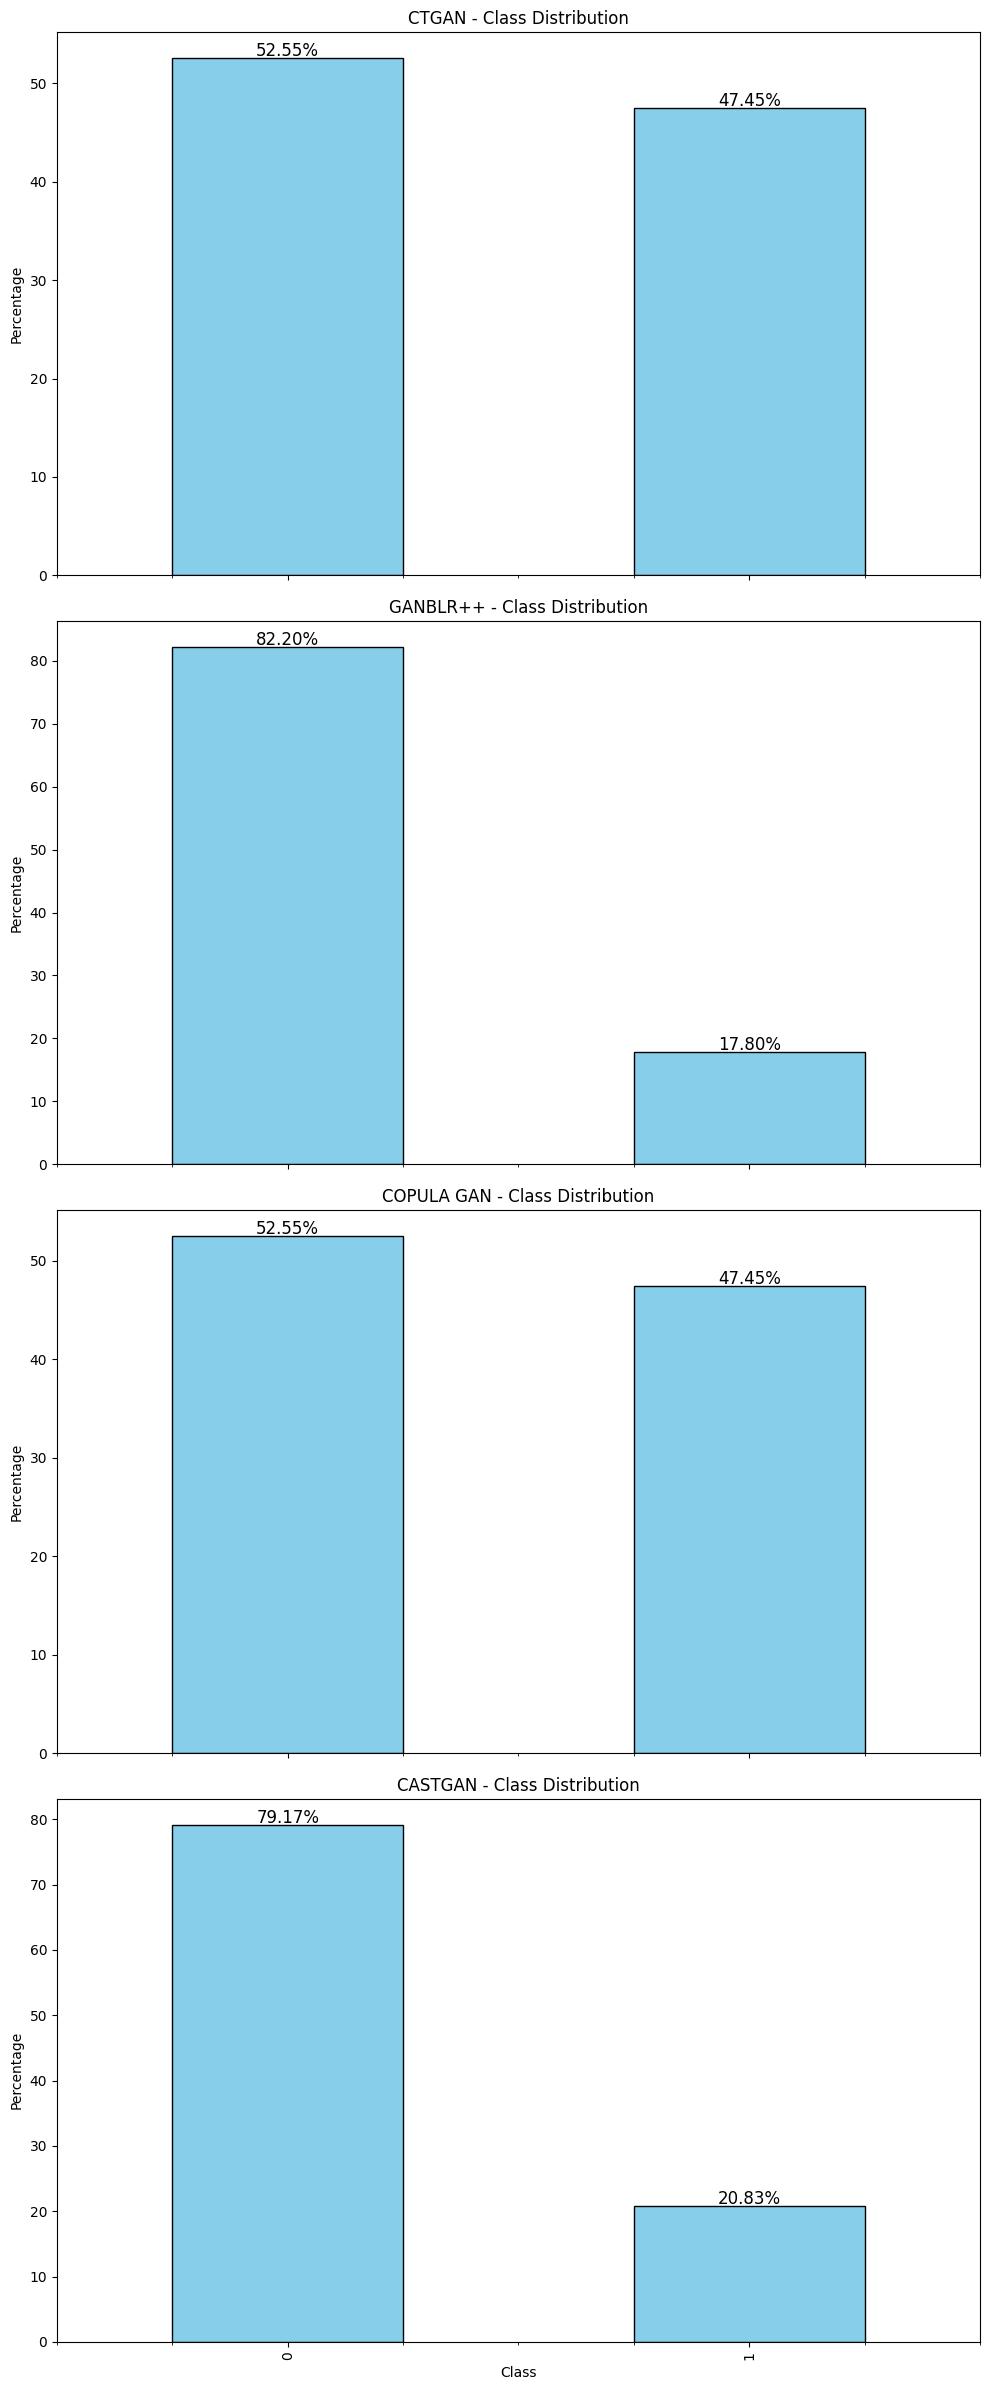


CTGAN - Class Proportions:
target
0    52.546858
1    47.453142
Name: proportion, dtype: float64

GANBLR++ - Class Proportions:
target
0    82.2
1    17.8
Name: proportion, dtype: float64

COPULA GAN - Class Proportions:
target
0    52.546894
1    47.453106
Name: proportion, dtype: float64

CASTGAN - Class Proportions:
target
0    79.165211
1    20.834789
Name: proportion, dtype: float64


In [19]:
# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Plotting class distribution
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 6 * len(datasets)), sharex=True)

for i, (data, title) in enumerate(zip(datasets, titles)):
    class_counts = data[target_column].value_counts(normalize=True) * 100  # Get class distribution in percentage
    class_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Annotate the bars with percentage values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                         textcoords='offset points')
    
    axes[i].set_title(f'{title} - Class Distribution')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

# Print the proportions numerically
for data, title in zip(datasets, titles):
    print(f"\n{title} - Class Proportions:")
    class_counts = data[target_column].value_counts(normalize=True) * 100
    print(class_counts)


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Features and target for the original dataset
X_real = df.drop(columns=[target_column])
y_real = df[target_column]

# Split the original data into train and test sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Train and test on real data (TRTR)
model_real = RandomForestClassifier(random_state=42)
model_real.fit(X_train_real, y_train_real)
y_pred_real = model_real.predict(X_test_real)
accuracy_real = accuracy_score(y_test_real, y_pred_real)
print(f'TRTR (Train and Test on Real) Accuracy: {accuracy_real:.4f}')

# Train on synthetic data and test on real data (TSTR)
accuracies = {}

for data, title in zip(datasets, titles):
    X_synth = data.drop(columns=[target_column])
    y_synth = data[target_column]
    
    model_synth = RandomForestClassifier(random_state=42)
    model_synth.fit(X_synth, y_synth)  # Train on synthetic data
    y_pred_synth = model_synth.predict(X_test_real)  # Test on real data
    accuracy_synth = accuracy_score(y_test_real, y_pred_synth)
    accuracies[title] = accuracy_synth
    print(f'TSTR (Train on {title}, Test on Real) Accuracy: {accuracy_synth:.4f}')

# Compare accuracies
comparison_df = pd.DataFrame({'Dataset': ['TRTR'] + titles, 'Accuracy': [accuracy_real] + list(accuracies.values())})
print('\nAccuracy Comparison:')
print(comparison_df)


TRTR (Train and Test on Real) Accuracy: 0.9978
TSTR (Train on CTGAN, Test on Real) Accuracy: 0.9531
TSTR (Train on GANBLR++, Test on Real) Accuracy: 0.5378
TSTR (Train on COPULA GAN, Test on Real) Accuracy: 0.9755
TSTR (Train on CASTGAN, Test on Real) Accuracy: 0.9734

Accuracy Comparison:
      Dataset  Accuracy
0        TRTR  0.997819
1       CTGAN  0.953129
2    GANBLR++  0.537832
3  COPULA GAN  0.975473
4     CASTGAN  0.973398


In [21]:

# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

for title, df in zip(titles, datasets):
    print(f"Dataset: {title}")
    print("Column-wise Min and Max values:")
    
    # Display the minimum values for each column
    print("Minimum values:")
    print(df.min())

    # Display the maximum values for each column
    print("\nMaximum values:")
    print(df.max())
    
    print("\n" + "="*50 + "\n")  # Add a separator between datasets for better readability


Dataset: CTGAN
Column-wise Min and Max values:
Minimum values:
 Average Packet Size            0.000000e+00
 Packet Length Std              0.000000e+00
 Packet Length Variance         0.000000e+00
 Packet Length Mean             0.000000e+00
 Total Length of Bwd Packets    0.000000e+00
 Subflow Bwd Bytes              0.000000e+00
 Destination Port               0.000000e+00
 Avg Bwd Segment Size           0.000000e+00
 Bwd Packet Length Mean         0.000000e+00
Init_Win_bytes_forward         -1.000000e+00
 Subflow Fwd Bytes              0.000000e+00
Total Length of Fwd Packets     0.000000e+00
 Max Packet Length              0.000000e+00
Bwd Packet Length Max           0.000000e+00
 Init_Win_bytes_backward       -1.000000e+00
 Fwd Packet Length Max          0.000000e+00
 Fwd Packet Length Mean         0.000000e+00
 Avg Fwd Segment Size           0.000000e+00
 Flow IAT Max                  -1.300000e+01
Flow Bytes/s                   -3.499149e+06
target                          0.000